In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel("/content/tip-amount.xlsx")
data

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14
5,6,51,5


In [ ]:
data.shape

(6, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Meal                     6 non-null      int64
 1   Observed total bill(xi)  6 non-null      int64
 2   Observed tip amount(yi)  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [ ]:
corrmatrix=data.corr()
corrmatrix

,Meal,Observed total bill(xi),Observed tip amount(yi)
Meal,1.000000,0.151123,-0.130931
Observed total bill(xi),0.151123,1.000000,0.865665
Observed tip amount(yi),-0.130931,0.865665,1.000000


<Axes: >

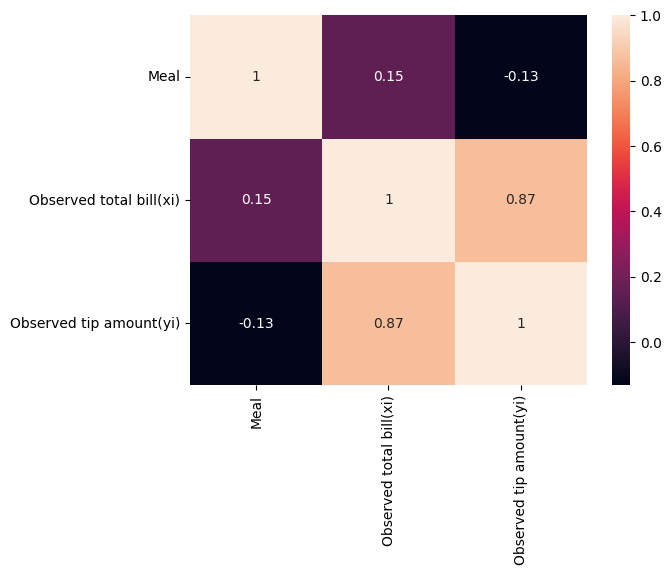

In [ ]:
sns.heatmap(corrmatrix,annot=True)

In [ ]:
y=data['Observed tip amount(yi)']
x=data.drop(['Observed tip amount(yi)'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Meal,Observed total bill(xi)
5,6,51
2,3,64
4,5,99
3,4,88


In [ ]:
y_train

5     5
2    11
4    14
3     8
Name: Observed tip amount(yi), dtype: int64

In [ ]:
y_test

0     5
1    17
Name: Observed tip amount(yi), dtype: int64

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
model=reg.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 7.72756456, 15.46875446])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r_score=r2_score(y_test,y_pred)
print("Mean squared error is: ",mse)
print("mean absolute error is: ",mae)
print("r2 score is: ",r_score)

Mean squared error is:  4.892160668179483
mean absolute error is:  2.129405050649163
r2 score is:  0.8641066481061255


In [ ]:
#r2 score is nearer to 1 so it is accurate to predict

#using advertising data

In [ ]:
df=pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
y=df['Sales']
x=df[['TV','Radio','Newspaper']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(160, 3)

In [ ]:
x_test.shape

(40, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
model=reg.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r_score=r2_score(y_test,y_pred)
print("Mean squared error is: ",mse)
print("mean absolute error is: ",mae)
print("r2 score is: ",r_score)

Mean squared error is:  3.1740973539761033
mean absolute error is:  1.4607567168117603
r2 score is:  0.899438024100912


In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

using #admission dataset

In [ ]:
df1=pd.read_csv("/content/Admission_Predict.csv")
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df1.drop(["Serial No."],axis=1,inplace=True)
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df1.shape

(400, 8)

In [ ]:
y=df1['Chance of Admit ']
x=df1[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [ ]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
209,301,104,3,3.5,4.0,8.12,1
280,311,102,3,4.5,4.0,8.64,1
33,340,114,5,4.0,4.0,9.60,1
210,325,108,4,4.5,4.0,9.06,1
93,301,97,2,3.0,3.0,7.88,1
...,...,...,...,...,...,...,...
246,316,105,3,3.0,3.5,8.73,0
227,312,110,2,3.5,3.0,8.53,0
369,301,98,1,2.0,3.0,8.03,1
176,329,119,4,4.5,4.5,9.16,1


In [ ]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

In [ ]:
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit , Length: 80, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
model=reg.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0.65117446, 0.72368741, 0.93536809, 0.82164316, 0.58158673,
       0.92863016, 0.52682366, 0.54308993, 0.65940583, 0.83834924,
       0.72008833, 0.90749769, 0.55354476, 0.89008648, 0.70389539,
       0.68664473, 0.66657268, 0.48196096, 0.69057217, 0.97493132,
       0.58802433, 0.65286881, 0.71150098, 0.53528647, 0.94677007,
       0.80982947, 0.69459383, 0.56495613, 0.68192423, 0.81039878,
       0.80796481, 0.94640983, 0.64599494, 0.51104918, 0.65983663,
       0.66907811, 0.71572271, 0.64556878, 0.61540702, 0.87367833,
       0.74275261, 0.59782649, 0.77456683, 0.95944897, 0.85124125,
       0.83554825, 0.94662422, 0.64822919, 0.92247594, 0.85906183,
       0.89624998, 0.72869743, 0.78874783, 0.95142703, 0.57325803,
       0.58744723, 0.68621316, 0.84544646, 0.60495144, 0.84808919,
       0.66642894, 0.65524969, 0.70024808, 0.51206905, 0.62930376,
       0.7173701 , 0.62200838, 0.84170334, 0.85675802, 0.79886217,
       0.72196478, 0.81448203, 0.87373609, 0.83332085, 0.52554

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r_score=r2_score(y_test,y_pred)
print("Mean squared error is: ",mse)
print("mean absolute error is: ",mae)
print("r2 score is: ",r_score)

Mean squared error is:  0.004617003377285005
mean absolute error is:  0.047956733620911976
r2 score is:  0.8212082591486993


In [ ]:
x=df1[['TOEFL Score']].values
y=df1['Chance of Admit '].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
linmodel=LinearRegression()
linmodel.fit(x_train,y_train)
y_pred=linmodel.predict(x_test)

Text(0, 0.5, 'CHANCE OF ADMIT')

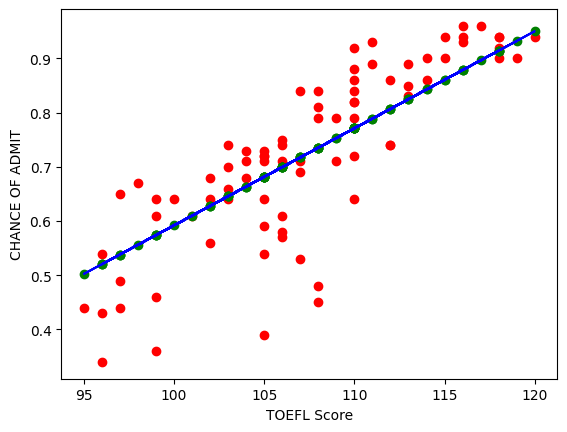

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel('TOEFL Score')
plt.ylabel('CHANCE OF ADMIT')

In [ ]:
#plot the comparison on tv expenses with sales amount

In [ ]:
x=df[['TV']].values
y=df['Sales'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
linmodel=LinearRegression()
linmodel.fit(x_train,y_train)
y_pred=linmodel.predict(x_test)

Text(0, 0.5, 'Sales')

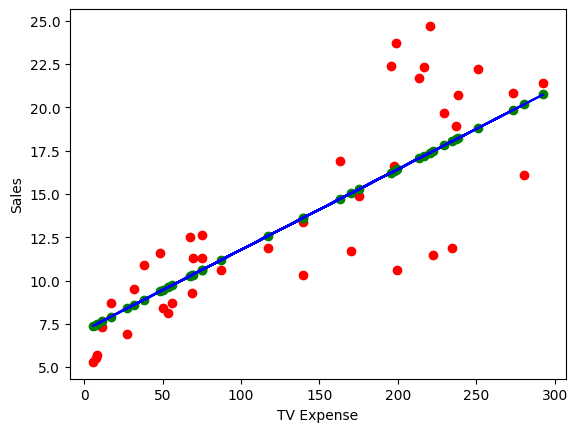

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='green')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel('TV Expense')
plt.ylabel('Sales')